# Examen del 2do Parcial
#####  Martha Paola Álvarez Pérez

In [120]:
import mne
import numpy as np
import pandas as pd
from scipy.signal import coherence, hilbert
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
import matplotlib.cm as cm
import community as community_louvain
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat

In [ ]:
#Ejercicio 1
# 1. Utilizando el dataset de _Coactivation_matrix.mat_:

coa = r"C:\Users\Lenovo\Documents\GitHub\Neurociencias-2026-1\S03_datasets\Coactivation_matrix.mat"
coa_dict = scipy.io.loadmat(coa)

print(coa_dict.keys())
mat = coa_dict['Coactivation_matrix']
mat_df = pd.DataFrame(mat)
G = nx.from_pandas_adjacency(mat_df)

if G.is_directed():
    G = G.to_undirected()

#  Calcule el coeficiente de mundo pequeño
C = nx.average_clustering(G)
Gcc = G.subgraph(max(nx.connected_components(G), key=len))
L = nx.average_shortest_path_length(Gcc)
Gr = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
Cr = nx.average_clustering(Gr)
Gcc_r = Gr.subgraph(max(nx.connected_components(Gr), key=len))
Lr = nx.average_shortest_path_length(Gcc_r)
sigma = (C / Cr) / (L / Lr)
display(f"σ = {sigma:.3f} → {'Mundo pequeño' if sigma > 1 else 'No es mundo pequeño'}")

# - Calcule las comunidades del grafo
C = nx.average_clustering(G)
Gcc = G.subgraph(max(nx.connected_components(G), key=len))
L = nx.average_shortest_path_length(Gcc)
Gr = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
Cr = nx.average_clustering(Gr)
Gcc_r = Gr.subgraph(max(nx.connected_components(Gr), key=len))
Lr = nx.average_shortest_path_length(Gcc_r)
sigma = (C / Cr) / (L / Lr)
print(f"σ = {sigma:.3f} → {'Mundo pequeño' if sigma > 1 else 'No es mundo pequeño'}")

# - Calcule los hub
grados = dict(G.degree())
umbral = np.percentile(list(grados.values()), 90)
hubs = [n for n, g in grados.items() if g >= umbral]
print("\nHubs (grado en el percentil 90):", hubs)

# - Calcule la eficiencia global
def efi_global(G):
    inv_dist = []
    for comp in nx.connected_components(G):
        sub = G.subgraph(comp)
        length = dict(nx.all_pairs_shortest_path_length(sub))
        for s in length:
            for t, d in length[s].items():
                if d > 0:
                    inv_dist.append(1 / d)
    return np.mean(inv_dist)

Eg = efi_global(G)
print(f"\nEficiencia global: {Eg:.4f}")

# - Determine el grado de cada nodo
print("\nGrado de cada nodo:")
for n, g in grados.items():
    print(f"Nodo {n}: {g}")


dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])


'σ = 3.619 → Mundo pequeño'

σ = 3.606 → Mundo pequeño

Hubs (grado en el percentil 90): [7, 16, 19, 37, 38, 41, 42, 43, 44, 70, 97, 100, 121, 124, 126, 130, 135, 154, 186, 193, 202, 230, 231, 235, 237, 275, 286, 327, 328, 330, 331, 334, 344, 345, 346, 350, 353, 356, 365, 397, 399, 400, 405, 407, 410, 416, 418, 421, 452, 465, 477, 481, 482, 485, 488, 491, 494, 495, 496, 500, 621, 622, 623, 629, 630]

Eficiencia global: 0.4949

Grado de cada nodo:
Nodo 0: 32
Nodo 1: 26
Nodo 2: 38
Nodo 3: 37
Nodo 4: 29
Nodo 5: 58
Nodo 6: 88
Nodo 7: 124
Nodo 8: 29
Nodo 9: 57
Nodo 10: 54
Nodo 11: 59
Nodo 12: 44
Nodo 13: 49
Nodo 14: 50
Nodo 15: 36
Nodo 16: 124
Nodo 17: 49
Nodo 18: 86
Nodo 19: 109
Nodo 20: 73
Nodo 21: 37
Nodo 22: 62
Nodo 23: 47
Nodo 24: 31
Nodo 25: 54
Nodo 26: 20
Nodo 27: 35
Nodo 28: 27
Nodo 29: 40
Nodo 30: 30
Nodo 31: 42
Nodo 32: 31
Nodo 33: 37
Nodo 34: 29
Nodo 35: 56
Nodo 36: 49
Nodo 37: 108
Nodo 38: 149
Nodo 39: 73
Nodo 40: 78
Nodo 41: 114
Nodo 42: 120
Nodo 43: 123
Nodo 44: 126
Nodo 45: 76
Nodo 46: 90
Nodo 47: 43
Nod

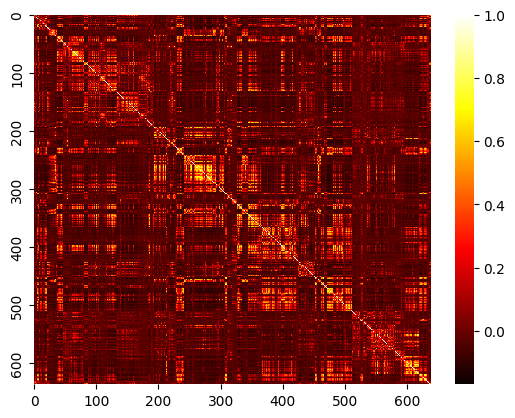

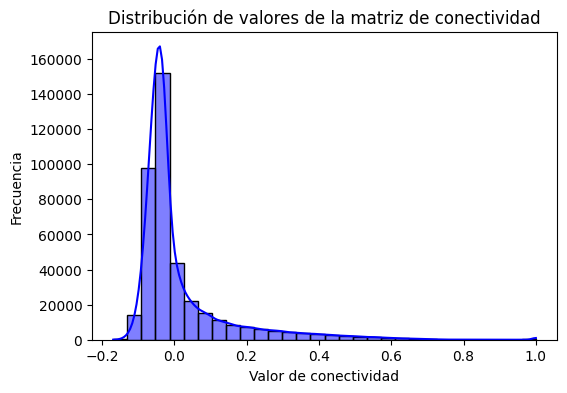

'Percentil 0.25 (Q1): -0.0546'

'Percentil 0.50 (Mediana): -0.0320'

'Percentil 0.75 (Q3): 0.0215'

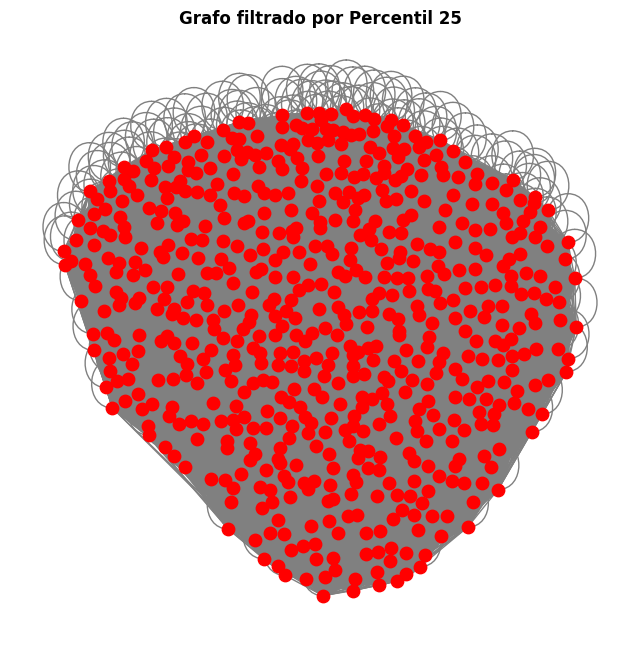

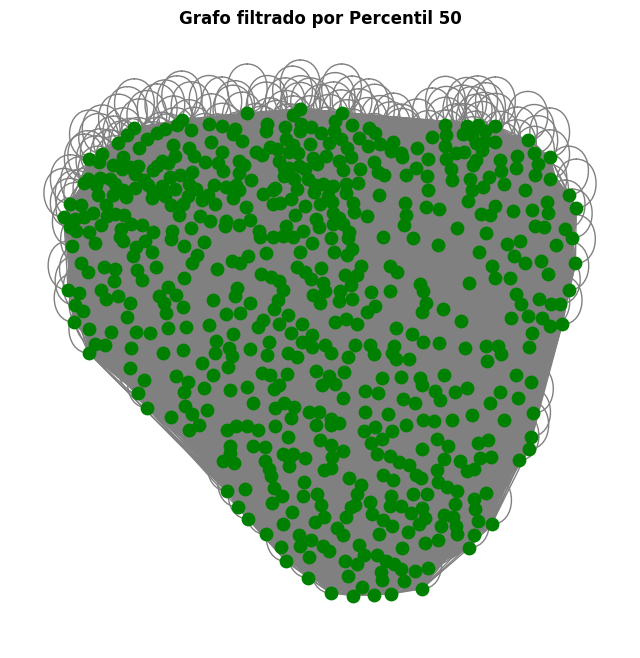

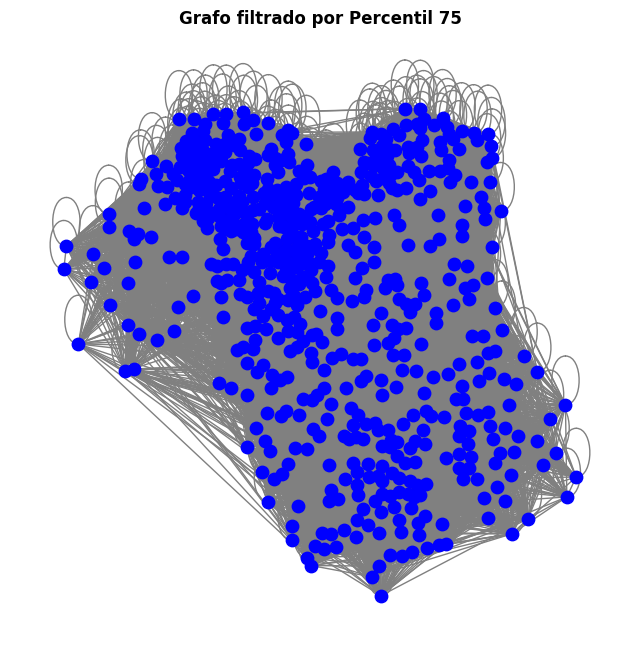

In [58]:
# Ejercicio 2 
# 2. Utilizando el dataset de _Coactivation_matrix.mat_:

# - Generar el mapa de calor de cada matriz de conectividad
corr_matp = mat_df.corr().values
ax = sns.heatmap(corr_matp, annot=False, fmt=".0f", cmap='hot',
                xticklabels=100, yticklabels=100)
plt.show()

# - Generar la distribución de datos de cada matriz de conectividad
valores =corr_matp.flatten() 
plt.figure(figsize=(6,4))
sns.histplot(valores, bins=30, kde=True, color='blue')
plt.title("Distribución de valores de la matriz de conectividad")
plt.xlabel("Valor de conectividad")
plt.ylabel("Frecuencia")
plt.show()

# - ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
p25 = np.percentile(valores, 25)
p50 = np.percentile(valores, 50)
p75 = np.percentile(valores, 75)
display(f"Percentil 0.25 (Q1): {p25:.4f}")
display(f"Percentil 0.50 (Mediana): {p50:.4f}")
display(f"Percentil 0.75 (Q3): {p75:.4f}")

# Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior)
percentiles = [
    (p25, "Percentil 25", "red"),
    (p50, "Percentil 50", "green"),
    (p75, "Percentil 75", "blue")
]

for per, titulo, color in percentiles:
    # Filtrar la matriz según el percentil
    matriz_filtrada = np.where(corr_matp >= per, corr_matp, 0)
    
    # Crear grafo
    G = nx.from_numpy_array(matriz_filtrada)
    
    # Layout y visualización
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx(G, pos,
                     node_size=80, 
                     node_color=color, 
                     edge_color='gray', 
                     with_labels=False)
    
    plt.title(f"Grafo filtrado por {titulo}", fontsize=12, fontweight='bold')
    plt.axis('off')
    plt.show()
    

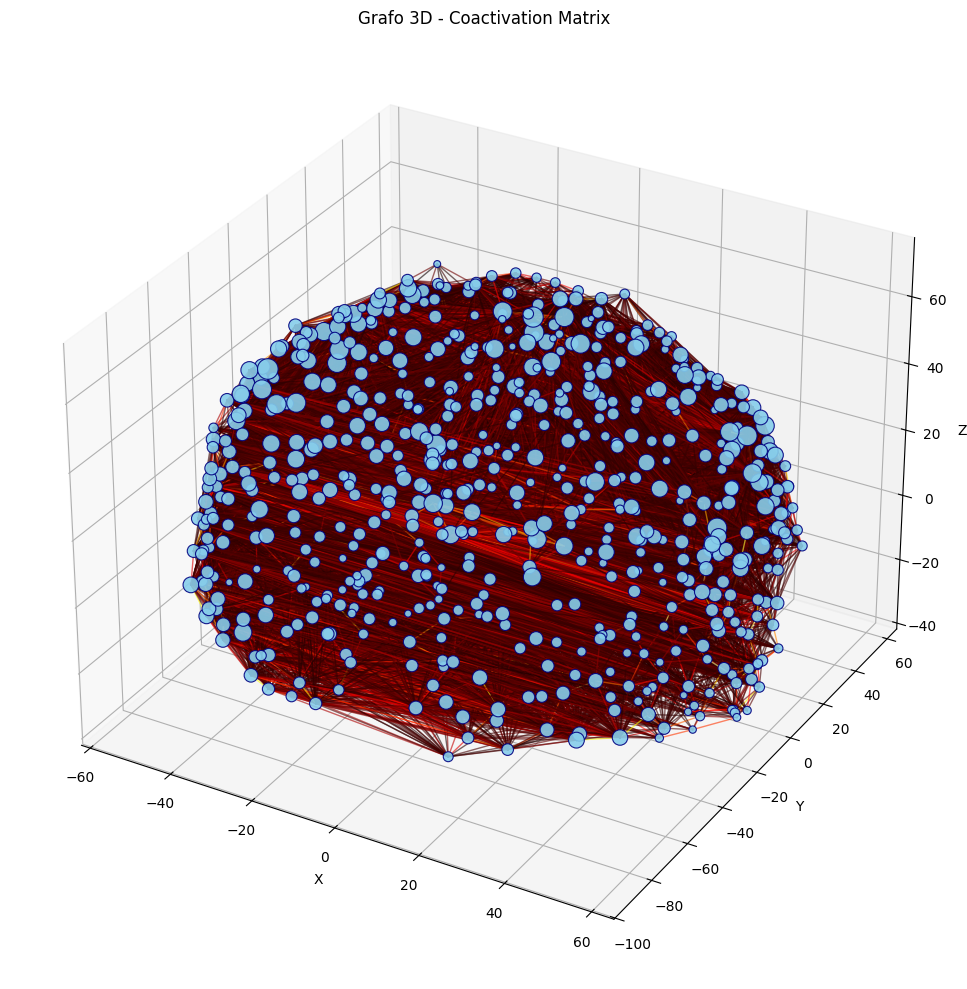

In [ ]:
# Ejercicio 3
# 3. Utilizando el dataset de _Coactivation_matrix.mat_

# - Genere el grafo 3D
G_3d = nx.from_pandas_adjacency(df)

# - Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
degrees_3d = dict(G_3d.degree())
grado_array = np.array(list(degrees_3d.values()))
node_sizes = 20 + (grado_array - grado_array.min()) / (grado_array.max() - grado_array.min()) * 200

edge_weights = np.array([G_3d[u][v].get('weight', 0) for u, v in G_3d.edges()])
if np.max(edge_weights) != np.min(edge_weights):
    norm_edge_weights = (edge_weights - np.min(edge_weights)) / (np.max(edge_weights) - np.min(edge_weights))
else:
    norm_edge_weights = np.zeros_like(edge_weights)

cmap = plt.get_cmap('hot')
edge_colors = cmap(norm_edge_weights)

# - Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
node_xyz = np.array([coords[i] for i in G_3d.nodes()])
ax.scatter(node_xyz[:, 0], node_xyz[:, 1], node_xyz[:, 2],
           s=node_sizes, c='skyblue', alpha=0.9, edgecolors='navy', linewidths=0.8)

for i, (u, v) in enumerate(G_3d.edges()):
    x = [coords[u][0], coords[v][0]]
    y = [coords[u][1], coords[v][1]]
    z = [coords[u][2], coords[v][2]]
    ax.plot(x, y, z, color=edge_colors[i], alpha=0.6, linewidth=1.0)
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Grafo 3D - Coactivation Matrix')
all_x = node_xyz[:, 0]
all_y = node_xyz[:, 1]
all_z = node_xyz[:, 2]
ax.set_xlim(all_x.min(), all_x.max())
ax.set_ylim(all_y.min(), all_y.max())
ax.set_zlim(all_z.min(), all_z.max())

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [113]:
#Ejercicio 4 
# 4. Utilizando el dataset de _chb01_01.edf_:
    
# - Calcule el coeficiente de mundo pequeño
# - Calcule las comunidades del grafo
# - Calcule los hub
# - Calcule la eficiencia global
# - Calcule la eficiencia local
# - Determine el grado de cada nodo 


chb01 = r"C:\Users\Lenovo\Documents\GitHub\Neurociencias-2026-1\S03_datasets\chb01_01.edf"
sfreq_target = 256


raw = mne.io.read_raw_edf(chb01, preload=True)
raw.resample(sfreq_target)
raw.filter(1., 45., fir_design='firwin')

data = raw.get_data()
n_channels = data.shape[0]

corr_mat = np.corrcoef(data)
threshold = np.percentile(corr_mat, 50)
adj_matrix = np.where(corr_mat >= threshold, 1, 0)

G = nx.from_numpy_array(adj_matrix)
C = nx.average_clustering(G)
try:
    L = nx.average_shortest_path_length(G)
except nx.NetworkXError:
    largest_cc = max(nx.connected_components(G), key=len)
    G_lcc = G.subgraph(largest_cc)
    L = nx.average_shortest_path_length(G_lcc)

G_rand = nx.gnm_random_graph(n_channels, G.number_of_edges())
C_rand = nx.average_clustering(G_rand)

try:
    L_rand = nx.average_shortest_path_length(G_rand)
except nx.NetworkXError:
    largest_cc_rand = max(nx.connected_components(G_rand), key=len)
    G_lcc_rand = G_rand.subgraph(largest_cc_rand)
    L_rand = nx.average_shortest_path_length(G_lcc_rand)

# - Calcule el coeficiente de mundo pequeño
sigma = (C / C_rand) / (L / L_rand)

display(f"Coeficiente de clustering C: {C:.4f}")
display(f"Camino promedio L: {L:.4f}")
display(f"C_aleatorio: {C_rand:.4f}, L_aleatorio: {L_rand:.4f}")
display(f"Small-worldness σ: {sigma:.4f}")

# - Calcule las comunidades del grafo 
partition = community_louvain.best_partition(G, weight='weight')
communities = {}
for node, com in partition.items():
    communities.setdefault(com, []).append(node)

display("\nComunidades detectadas:")
for com, nodes in communities.items():
    display(f"  Comunidad {com}: {nodes}")
    
# - Calcule los hub

degree_dict = dict(G.degree())
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)
hubs = sorted_degree[:5]  
display("\nHubs (mayor grado):", hubs)

# - Calcule la eficiencia global y local
E_global = nx.global_efficiency(G)
E_local = nx.local_efficiency(G)
display(f"\nEficiencia global: {E_global:.4f}")
display(f"Eficiencia local: {E_local:.4f}")

# - Determine el grado de cada nodo 
display("\nGrado de cada nodo:")
for node, deg in degree_dict.items():
    display(f"  Nodo {node}: grado {deg}")




Extracting EDF parameters from C:\Users\Lenovo\Documents\GitHub\Neurociencias-2026-1\S03_datasets\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8052\3746604845.py:16: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(chb01, preload=True)


Sampling frequency of the instance is already 256.0, returning unmodified.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (3.301 s)



'Coeficiente de clustering C: 0.6946'

'Camino promedio L: 1.5022'

'C_aleatorio: 0.5800, L_aleatorio: 1.4308'

'Small-worldness σ: 1.1406'

'\nComunidades detectadas:'

'  Comunidad 0: [0, 10, 19]'

'  Comunidad 5: [1, 4, 12, 20]'

'  Comunidad 2: [2, 3, 6, 7, 11, 15, 17]'

'  Comunidad 1: [5, 8, 14, 16, 22]'

'  Comunidad 3: [9, 13, 21]'

'  Comunidad 4: [18]'

'\nHubs (mayor grado):'

[(6, 18), (9, 18), (16, 18), (17, 18), (5, 17)]

'\nEficiencia global: 0.6917'

'Eficiencia local: 0.8489'

'\nGrado de cada nodo:'

'  Nodo 0: grado 14'

'  Nodo 1: grado 11'

'  Nodo 2: grado 14'

'  Nodo 3: grado 14'

'  Nodo 4: grado 10'

'  Nodo 5: grado 17'

'  Nodo 6: grado 18'

'  Nodo 7: grado 9'

'  Nodo 8: grado 12'

'  Nodo 9: grado 18'

'  Nodo 10: grado 17'

'  Nodo 11: grado 13'

'  Nodo 12: grado 15'

'  Nodo 13: grado 17'

'  Nodo 14: grado 14'

'  Nodo 15: grado 9'

'  Nodo 16: grado 18'

'  Nodo 17: grado 18'

'  Nodo 18: grado 2'

'  Nodo 19: grado 4'

'  Nodo 20: grado 6'

'  Nodo 21: grado 4'

'  Nodo 22: grado 14'

Número de canales: 23
Matriz de conectividad shape: (23, 23)


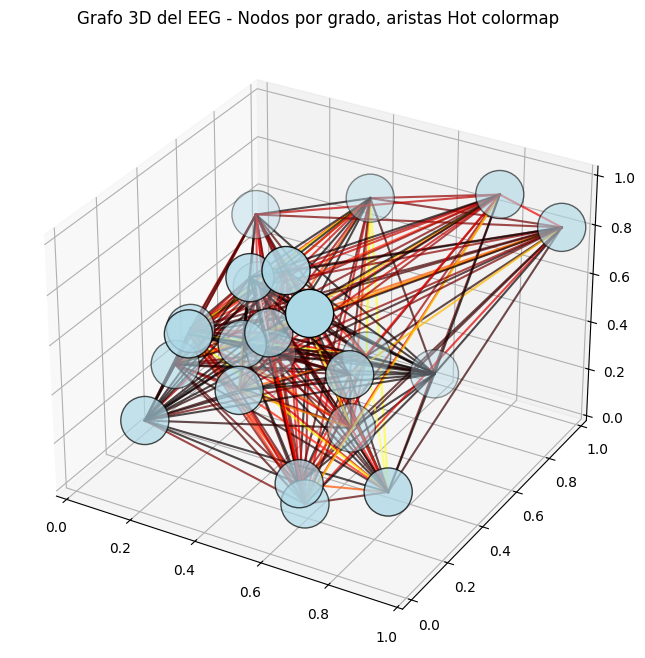

In [123]:
#Ejercicio 5
# 5. Utilizando el dataset de _chb01_01.edf_:


# - Genere el grafo 3D
data = raw.get_data()  # shape: canales x tiempos
n_canales = data.shape[0]
print("Número de canales:", n_canales)

matriz_conect = np.corrcoef(data)
print("Matriz de conectividad shape:", matriz_conect.shape)

# Haga que el tamaño de nodos sea proporcional a su grado; es decir, que entre mayor sea su grado, mayor sea el tamaño del nodo ploteado

grados = dict(G.degree())
G = nx.from_numpy_array(matriz_conect)

grados = dict(G.degree())
tamanos_nodos = [grados[n]*50 for n in G.nodes()]

np.random.seed(42)
pos = {i: (np.random.rand(), np.random.rand(), np.random.rand()) for i in G.nodes()}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# - Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot
for i, j in G.edges():
    x = [pos[i][0], pos[j][0]]
    y = [pos[i][1], pos[j][1]]
    z = [pos[i][2], pos[j][2]]
    weight = matriz_conect[i, j]
    ax.plot(x, y, z, c=cm.hot(weight), alpha=0.7)
    
    xs = [pos[i][0] for i in G.nodes()]
ys = [pos[i][1] for i in G.nodes()]
zs = [pos[i][2] for i in G.nodes()]
ax.scatter(xs, ys, zs, s=tamanos_nodos, c='lightblue', edgecolors='k')

ax.set_title("Grafo 3D del EEG - Nodos por grado, aristas Hot colormap")
plt.show()
